In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from scipy import signal

In [ ]:
pickles_address = '/content/drive/MyDrive/Brain-Computer Interfaces/Epilepsy Dataset/Pickles/'
A_address = '/content/drive/MyDrive/Brain-Computer Interfaces/Epilepsy Dataset/Z/'
B_address = '/content/drive/MyDrive/Brain-Computer Interfaces/Epilepsy Dataset/O/'
C_address = '/content/drive/MyDrive/Brain-Computer Interfaces/Epilepsy Dataset/N/'
D_address = '/content/drive/MyDrive/Brain-Computer Interfaces/Epilepsy Dataset/F/'
E_address = '/content/drive/MyDrive/Brain-Computer Interfaces/Epilepsy Dataset/S/'

In [ ]:
As = []
for each in os.listdir(A_address):
    if each[-3:] == 'txt':
        a = open(A_address + each, 'r').readlines()
        a = [float(x) for x in a]
        As.append(a)

As = np.array(As).T
print('As', As.shape)

Bs = []
for each in os.listdir(B_address):
    if each[-3:] == 'txt':
        b = open(B_address + each, 'r').readlines()
        b = [float(x) for x in b]
        Bs.append(b)

Bs = np.array(Bs).T
print('Bs', Bs.shape)

Cs = []
for each in os.listdir(C_address):
    if each[-3:] == 'TXT':
        c = open(C_address + each, 'r').readlines()
        c = [float(x) for x in c]
        Cs.append(c)

Cs = np.array(Cs).T
print('Cs', Cs.shape)

Ds = []
for each in os.listdir(D_address):
    if each[-3:] == 'txt':
        d = open(D_address + each, 'r').readlines()
        d = [float(x) for x in d]
        Ds.append(d)

Ds = np.array(Ds).T
print('Ds', Ds.shape)

Es = []
for each in os.listdir(E_address):
    if each[-3:] == 'txt':
        e = open(E_address + each, 'r').readlines()
        e = [float(x) for x in e]
        Es.append(e)

Es = np.array(Es).T
print('Es', Es.shape)

In [ ]:
with open(pickles_address + 'As.pickle', 'wb') as f:
    pickle.dump(As, f)
with open(pickles_address + 'Bs.pickle', 'wb') as f:
    pickle.dump(Bs, f)
with open(pickles_address + 'Cs.pickle', 'wb') as f:
    pickle.dump(Cs, f)
with open(pickles_address + 'Ds.pickle', 'wb') as f:
    pickle.dump(Ds, f)
with open(pickles_address + 'Es.pickle', 'wb') as f:
    pickle.dump(Es, f)

In [ ]:
with open(pickles_address + 'As.pickle', 'rb') as f:
    As = pickle.load(f)
with open(pickles_address + 'Bs.pickle', 'rb') as f:
    Bs = pickle.load(f)
with open(pickles_address + 'Cs.pickle', 'rb') as f:
    Cs = pickle.load(f)
with open(pickles_address + 'Ds.pickle', 'rb') as f:
    Ds = pickle.load(f)
with open(pickles_address + 'Es.pickle', 'rb') as f:
    Es = pickle.load(f)
print('As', As.shape)
print('Bs', Bs.shape)
print('Cs', Cs.shape)
print('Ds', Ds.shape)
print('Es', Es.shape)

As (4097, 100)
Bs (4097, 100)
Cs (4097, 100)
Ds (4097, 100)
Es (4097, 100)


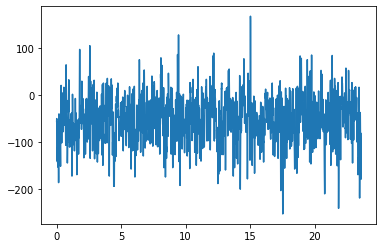

In [ ]:
from matplotlib import pyplot as plt
plt.plot(np.linspace(0, 23.6, num=4097), As[:, 0])
plt.show()

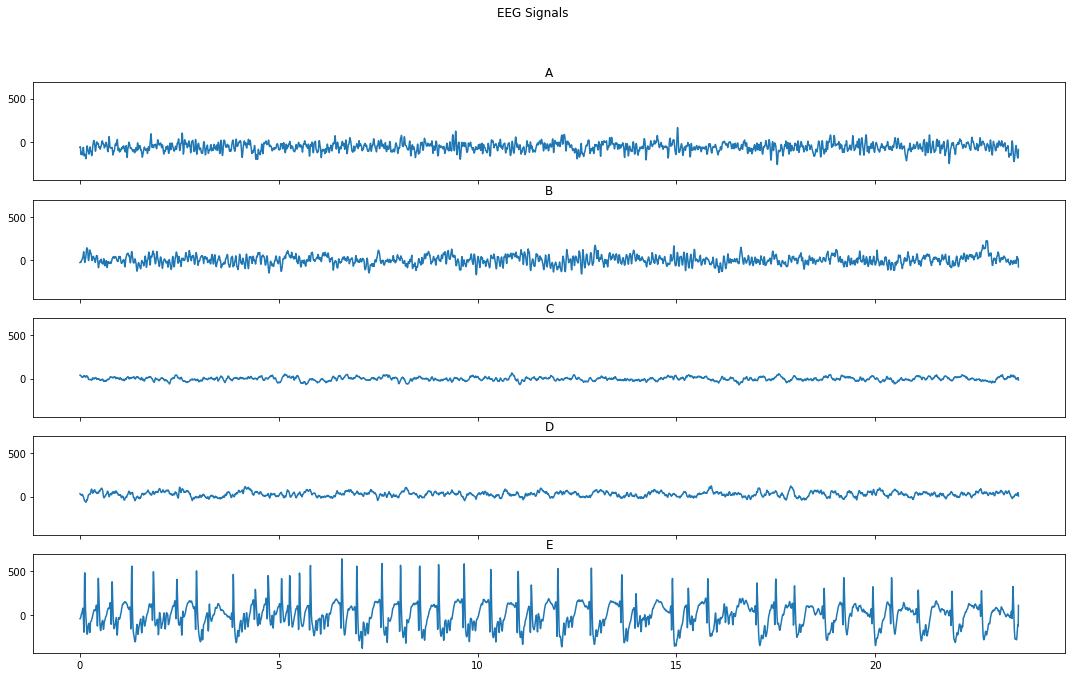

In [ ]:
fig, axs = plt.subplots(5, sharex=True, sharey=True)
fig.suptitle('EEG Signals')
fig.set_size_inches(18.5, 10.5)
axs[0].set_title('A')
axs[0].plot(np.linspace(0, 23.6, num=4097), As[:, 0])
axs[1].set_title('B')
axs[1].plot(np.linspace(0, 23.6, num=4097), Bs[:, 0])
axs[2].set_title('C')
axs[2].plot(np.linspace(0, 23.6, num=4097), Cs[:, 0])
axs[3].set_title('D')
axs[3].plot(np.linspace(0, 23.6, num=4097), Ds[:, 0])
axs[4].set_title('E')
axs[4].plot(np.linspace(0, 23.6, num=4097), Es[:, 0])

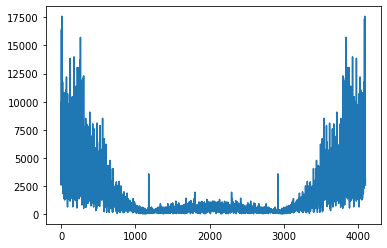

In [ ]:
fft = np.fft.fft(As[:, 1])
plt.plot(np.absolute(fft))
plt.show()

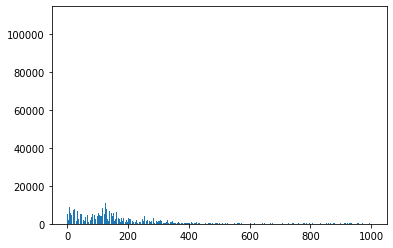

In [ ]:
n = 2000
fs = 173.61
fx = np.absolute(np.fft.fft(As[:, 0], n))
fx = fx[:int(n/2) + 1]

plt.bar([i for i, _ in enumerate(fx)], fx)
plt.show()

In [ ]:
rf = np.linspace(0, fs/2, num=int(n/2)+1)
print(rf)

[ 0.        0.086805  0.17361  ... 86.63139  86.718195 86.805   ]


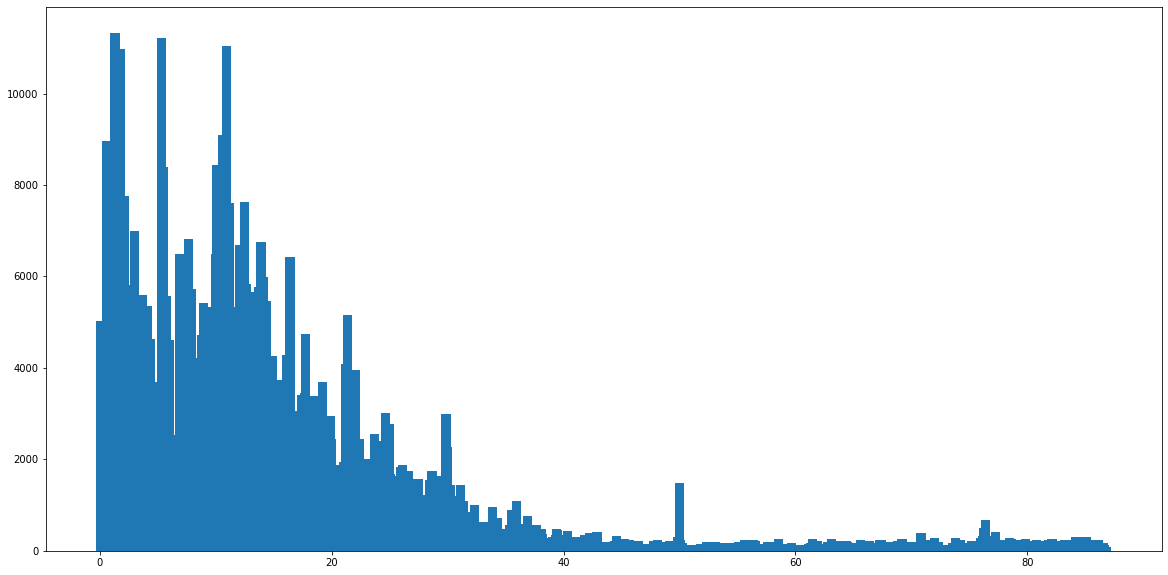

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(rf[1:], fx[1:])
plt.show()

[565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587]


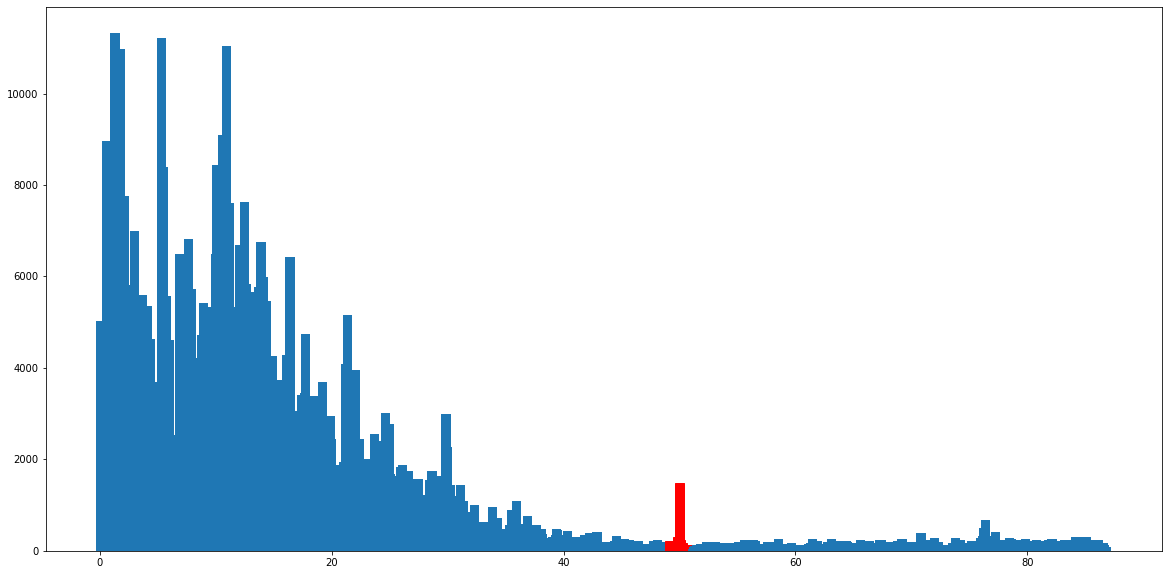

In [ ]:
rf_noise_idx = [i for i in range(len(rf)) if rf[i] > 49 and rf[i] < 51]
print(rf_noise_idx)

plt.figure(figsize=(20,10))
barlist = plt.bar(rf[1:], fx[1:])
for i in rf_noise_idx:
    barlist[i].set_color('r')
plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]


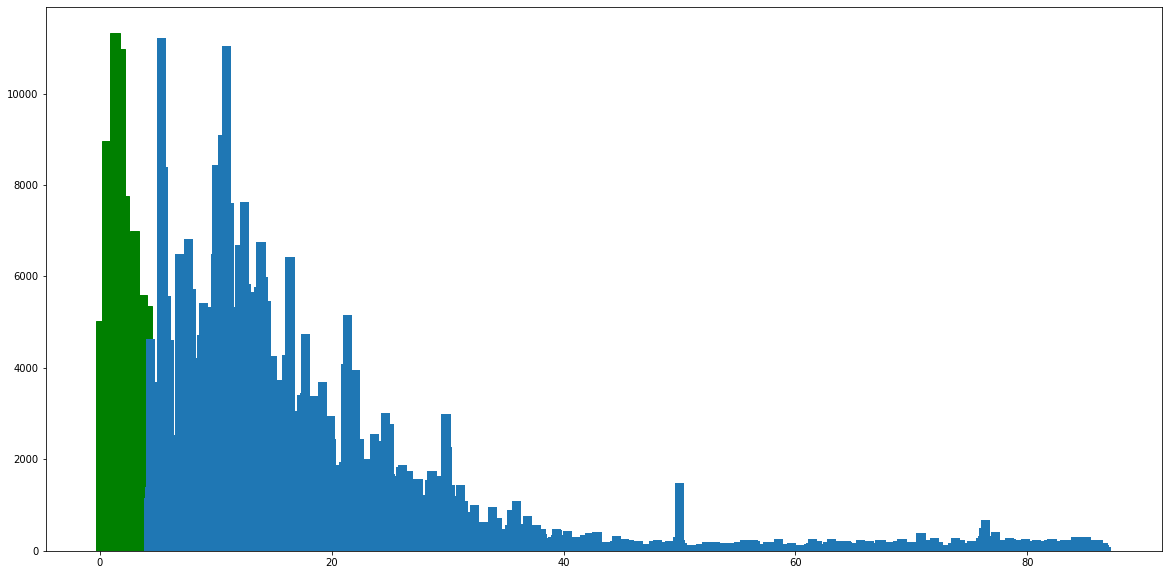

In [ ]:
delta_idx = [i for i in range(len(rf)) if rf[i] >= 0 and rf[i] <= 4]
print(delta_idx)

plt.figure(figsize=(20,10))
barlist = plt.bar(rf[1:], fx[1:])
for i in delta_idx:
    barlist[i].set_color('g')
plt.show()

In [ ]:
print(len(rf))
rf = list(rf) + list(reversed(rf))
print(len(rf))

1001
2002


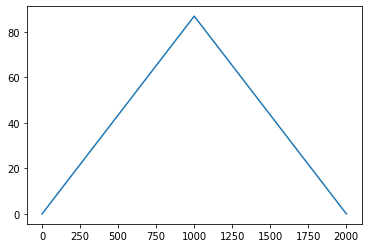

In [ ]:
plt.plot(rf)
plt.show()

Low Pass Filter

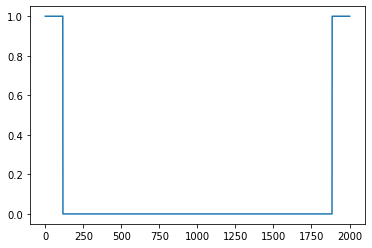

In [ ]:
fh = 10
H = [1 if x < fh else 0 for x in rf]
H = np.array(H)

plt.plot(H)
plt.show()

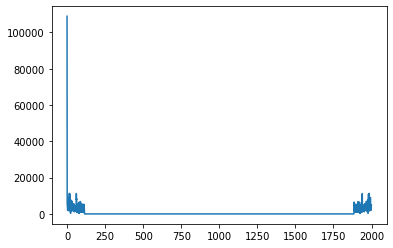

In [ ]:
fx = np.fft.fft(As[:, 0], n)
Fx = fx * H[1:-1]

plt.plot(np.absolute(Fx))
plt.show()

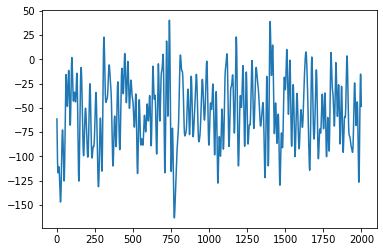

In [ ]:
sig_denoised = np.real(np.fft.ifft(Fx))

plt.plot(sig_denoised)
plt.show()

Butterworth Filter

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


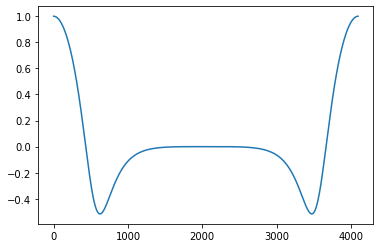

In [ ]:
order = 3
fh = 25
wn = fh / (fs / 2)
b, a = signal.butter(order, wn, btype='low')
n = len(As[:, 0])
fx = np.fft.fft(As[:, 1], n)
B = np.fft.fft(b, n)
A = np.fft.fft(a, n)
H = B / A

plt.plot(H)
plt.show()

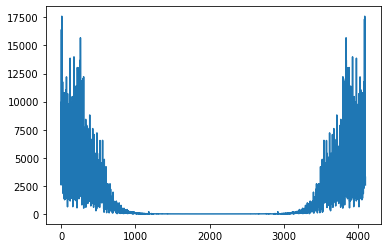

In [ ]:
Fx = fx * H

plt.plot(np.absolute(Fx))
plt.show()

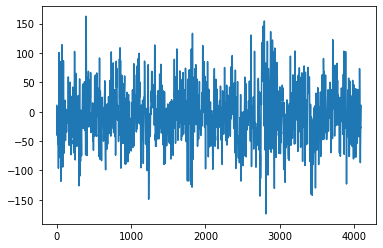

In [ ]:
sig_denoised = np.real(np.fft.ifft(Fx))

plt.plot(sig_denoised)
plt.show()

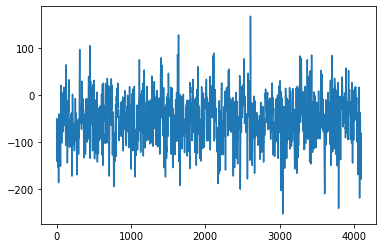

In [ ]:
sig1 = As[:, 0]
fft1 = np.fft.fft(sig1)

plt.plot(sig1)
plt.show()

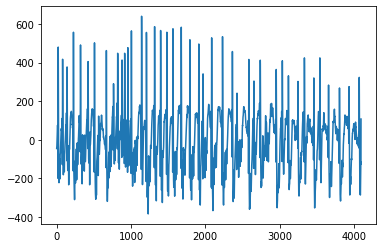

In [ ]:
sig2 = Es[:, 0]
fft2 = np.fft.fft(sig2)

plt.plot(sig2)
plt.show()

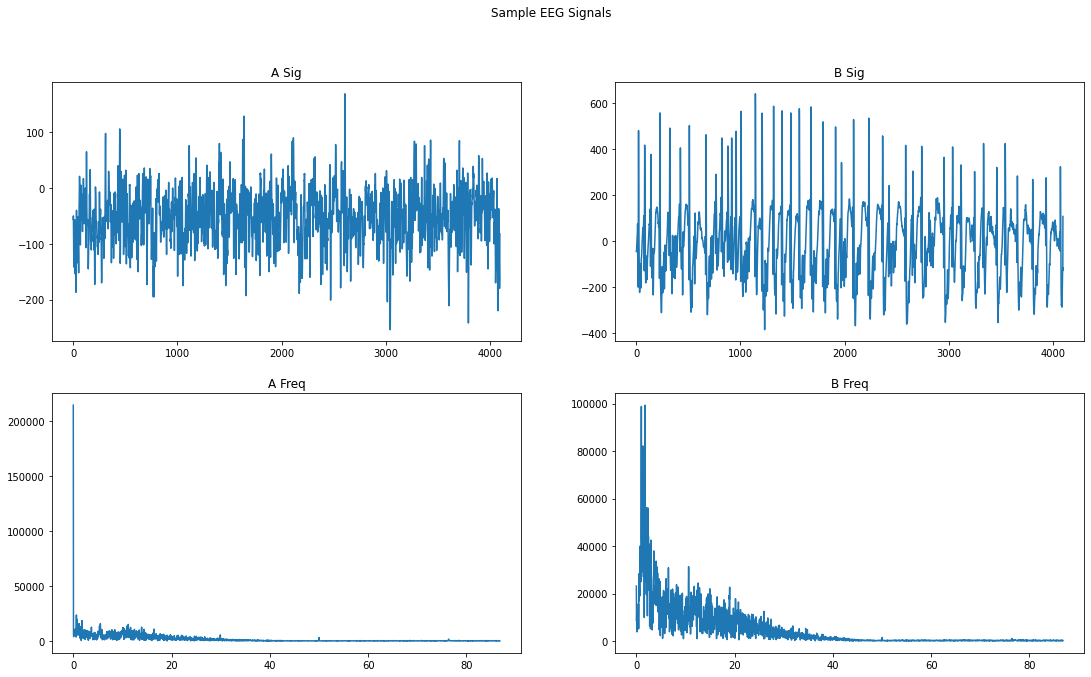

In [ ]:
rf = np.linspace(0, fs/2, num=int(n/2)+1)
fig, axs = plt.subplots(2, 2)
fig.suptitle('Sample EEG Signals')
fig.set_size_inches(18.5, 10.5)
axs[0, 0].set_title('A Sig')
axs[0, 0].plot(sig1)
axs[1, 0].set_title('A Freq')
axs[1, 0].plot(rf, np.absolute(fft1)[:int(n/2) + 1])
axs[0, 1].set_title('B Sig')
axs[0, 1].plot(sig2)
axs[1, 1].set_title('B Freq')
axs[1, 1].plot(rf, np.absolute(fft2)[:int(n/2) + 1])

In [ ]:
 def butter_bandstop_filter(data, lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq

    i, u = signal.butter(order, [low, high], btype='bandstop')
    y = signal.filtfilt(i, u, data)
    return y

y = butter_bandstop_filter(sig1, 49, 51, fs, 3)
y_fft = np.fft.fft(y)

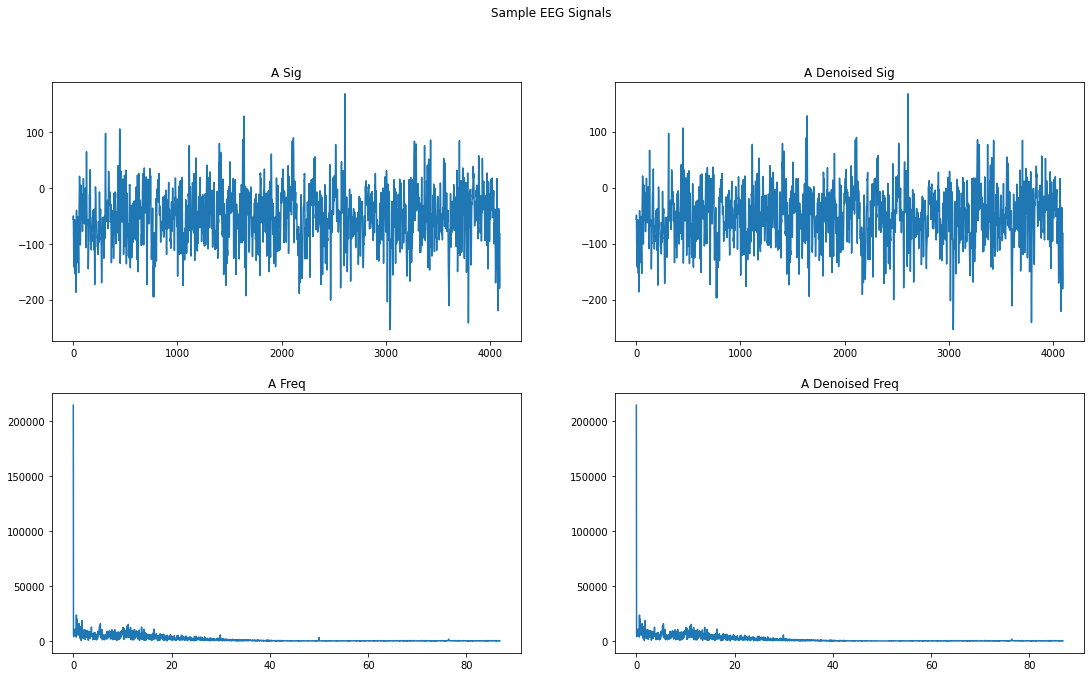

In [ ]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Sample EEG Signals')
fig.set_size_inches(18.5, 10.5)
axs[0, 0].set_title('A Sig')
axs[0, 0].plot(sig1)
axs[1, 0].set_title('A Freq')
axs[1, 0].plot(rf, np.absolute(fft1)[:int(n/2) + 1])
axs[0, 1].set_title('A Denoised Sig')
axs[0, 1].plot(y)
axs[1, 1].set_title('A Denoised Freq')
axs[1, 1].plot(rf, np.absolute(y_fft)[:int(n/2) + 1])

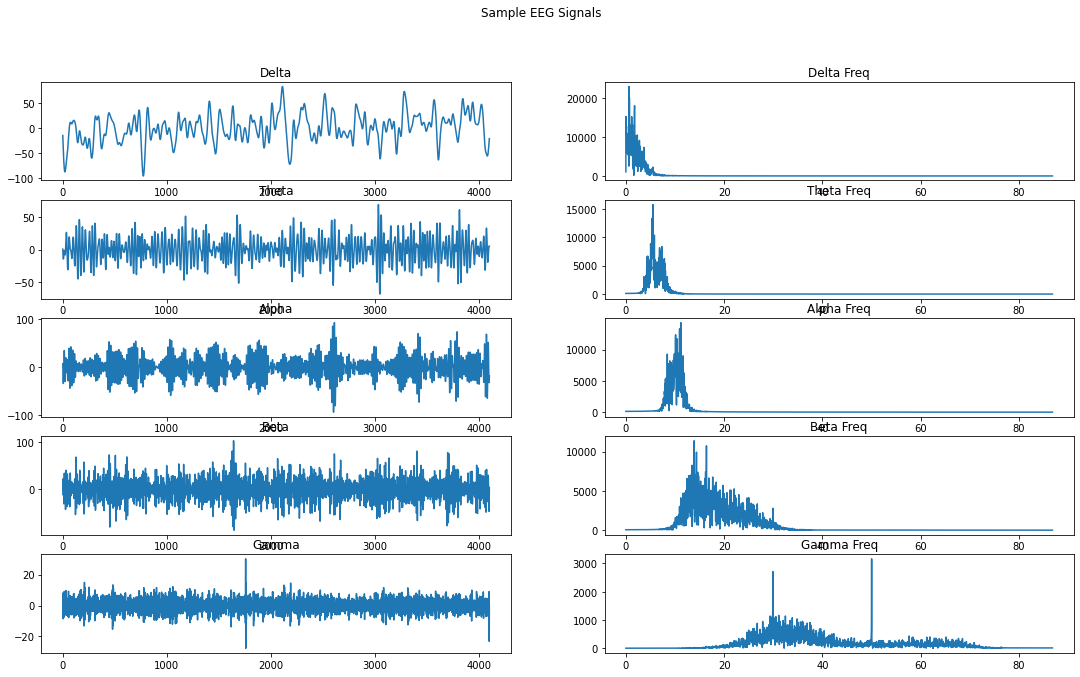

In [ ]:
def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq

    i, u = signal.butter(order, [low, high], btype='bandpass')
    y = signal.filtfilt(i, u, data)
    return y

sig_delta = butter_bandpass_filter(sig1, 0.001, 4, fs, 3)
sig_delta_fft = np.fft.fft(sig_delta)

sig_theta = butter_bandpass_filter(sig1, 4, 8, fs, 3)
sig_theta_fft = np.fft.fft(sig_theta)

sig_alpha = butter_bandpass_filter(sig1, 8, 12, fs, 3)
sig_alpha_fft = np.fft.fft(sig_alpha)

sig_beta = butter_bandpass_filter(sig1, 12, 30, fs, 3)
sig_beta_fft = np.fft.fft(sig_beta)

sig_gamma = butter_bandpass_filter(sig1, 30, 70, fs, 3)
sig_gamma_fft = np.fft.fft(sig_gamma)

fig, axs = plt.subplots(5, 2)
fig.suptitle('Sample EEG Signals')
fig.set_size_inches(18.5, 10.5)
axs[0, 0].set_title('Delta')
axs[0, 0].plot(sig_delta)
axs[0, 1].set_title('Delta Freq')
axs[0, 1].plot(rf, np.absolute(sig_delta_fft)[:int(n/2) + 1])
axs[1, 0].set_title('Theta')
axs[1, 0].plot(sig_theta)
axs[1, 1].set_title('Theta Freq')
axs[1, 1].plot(rf, np.absolute(sig_theta_fft)[:int(n/2) + 1])
axs[2, 0].set_title('Alpha')
axs[2, 0].plot(sig_alpha)
axs[2, 1].set_title('Alpha Freq')
axs[2, 1].plot(rf, np.absolute(sig_alpha_fft)[:int(n/2) + 1])
axs[3, 0].set_title('Beta')
axs[3, 0].plot(sig_beta)
axs[3, 1].set_title('Beta Freq')
axs[3, 1].plot(rf, np.absolute(sig_beta_fft)[:int(n/2) + 1])
axs[4, 0].set_title('Gamma')
axs[4, 0].plot(sig_gamma)
axs[4, 1].set_title('Gamma Freq')
axs[4, 1].plot(rf, np.absolute(sig_gamma_fft)[:int(n/2) + 1])